Some cells could not be run without running the previous cells. Remember to run the preprocessing first then make sure to run the whole cells in the main headings if you want to run 1 of the sub headings

# Library

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Text
from sklearn.cluster import KMeans

In [ ]:
!pip install -q tensorflow-recommenders
import tensorflow_recommenders as tfrs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Legit Test/data.csv')

Converting csv into db file for API purpose

In [ ]:
"""
import sqlite3
db_file = 'food_app.db'
conn = sqlite3.connect(db_file)"""
"""
table_schema = '''
CREATE TABLE transactions (
    trx_date TEXT,
    trx_date_detail TEXT,
    sales_id TEXT,
    concept TEXT,
    brand TEXT,
    outlet TEXT,
    district TEXT,
    city TEXT,
    menu_id TEXT,
    menu_type TEXT,
    menu_category TEXT,
    menu_category_detail TEXT,
    menu_name TEXT,
    quantity INTEGER,
    user_id TEXT,
    user_created_at TEXT,
    user_tier_level INTEGER,
    user_gender TEXT
);
'''
conn.execute(table_schema)
df.to_sql('transactions', conn, if_exists='append', index=False)
"""

"\ntable_schema = '''\nCREATE TABLE transactions (\n    trx_date TEXT,\n    trx_date_detail TEXT,\n    sales_id TEXT,\n    concept TEXT,\n    brand TEXT,\n    outlet TEXT,\n    district TEXT,\n    city TEXT,\n    menu_id TEXT,\n    menu_type TEXT,\n    menu_category TEXT,\n    menu_category_detail TEXT,\n    menu_name TEXT,\n    quantity INTEGER,\n    user_id TEXT,\n    user_created_at TEXT,\n    user_tier_level INTEGER,\n    user_gender TEXT\n);\n'''\nconn.execute(table_schema)\ndf.to_sql('transactions', conn, if_exists='append', index=False)\n"

# Reviewing the Data

In [ ]:
df.head()

,trx_date,trx_date_detail,sales_id,concept,brand,outlet,district,city,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender
0,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
1,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
2,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
3,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
4,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F


In [ ]:
df['trx_date_detail']

0        2023-01-04 20:26:46 UTC
1        2023-01-04 20:26:46 UTC
2        2023-01-04 20:26:46 UTC
3        2023-01-04 20:26:46 UTC
4        2023-01-04 20:26:46 UTC
                  ...           
26799    2023-01-01 21:46:16 UTC
26800    2023-01-01 21:46:16 UTC
26801    2023-01-01 21:46:16 UTC
26802    2023-01-01 21:46:16 UTC
26803    2023-01-01 21:46:16 UTC
Name: trx_date_detail, Length: 26804, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26804 entries, 0 to 26803
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trx_date              26804 non-null  object 
 1   trx_date_detail       26804 non-null  object 
 2   sales_id              26804 non-null  object 
 3   concept               26804 non-null  object 
 4   brand                 26804 non-null  object 
 5   outlet                26804 non-null  object 
 6   district              26804 non-null  object 
 7   city                  26804 non-null  object 
 8   menu_id               26804 non-null  object 
 9   menu_type             26804 non-null  object 
 10  menu_category         26804 non-null  object 
 11  menu_category_detail  26804 non-null  object 
 12  menu_name             26804 non-null  object 
 13  quantity              26804 non-null  float64
 14  user_id               26804 non-null  object 
 15  user_created_at    

In [ ]:
df['concept'].value_counts()

Resto        19073
Lifestyle     7731
Name: concept, dtype: int64

In [ ]:
df['brand'].value_counts()

Djournal           8208
TPC                4153
Osteria GIA        3974
Kitchenette        3004
Pizza E Birra      1522
Social House       1512
Tokyo Belly        1350
Social Garden       877
Publik Markette     593
Mr Fox              509
Skye                360
A/A                 231
Manarai             202
Djournal House      142
Sushi Groove        101
DF Kitchen           66
Name: brand, dtype: int64

In [ ]:
df['outlet'].value_counts()

Osteria GIA, Plaza Indonesia        1705
Social House, Grand Indonesia       1512
Osteria GIA, Pondok Indah Mall 2    1258
Djournal, Pondok Indah Mall 2       1063
Osteria GIA, Pacific Place          1011
                                    ... 
Djournal, Pasaraya Blok M              9
Kitchenette, Kuta Beachwalk            6
Djournal, MRT Blok M                   4
Djournal, Kuta Beachwalk               3
TPC, Pasaraya Blok M                   1
Name: outlet, Length: 100, dtype: int64

In [ ]:
df['district'].value_counts()

Menteng              5008
Kebayoran Lama       4284
Kebayoran Baru       3169
Tanah Abang          2949
Pondok Aren          1414
Setia Budi           1410
Sukajadi             1015
Tegalsari             864
Tebet                 679
Grogol Petamburan     641
Mulyorejo             637
Wiyung                613
Kelapa Gading         606
Penjaringan           473
Serpong Utara         465
Denpasar Barat        396
Cakung                354
Kembangan             346
Kelapa Dua            257
Cilandak              206
Kuta Selatan          202
Kemayoran             195
Tanjung Priok         175
Beji                  143
Andir                 130
Kalideres              67
Cibinong               58
Babakan Madang         26
Kuta Utara             13
Kuta                    9
Name: district, dtype: int64

In [ ]:
df['city'].value_counts()

Jakarta Selatan      9748
Jakarta Pusat        8152
Surabaya             2114
Tangerang Selatan    1879
Jakarta Utara        1254
Bandung, Kota        1145
Jakarta Barat        1054
Denpasar              396
Jakarta Timur         354
Tangerang, Kab.       257
Badung                224
Depok                 143
Bogor, Kab.            84
Name: city, dtype: int64

In [ ]:
df['menu_id'].value_counts()

c482f57f-68ae-4f9b-b1a1-cd4c005279fc    549
16d7a8e4-1455-4e99-a84c-c82c10aa8e61    453
0a8d829f-ce91-4450-a2ae-a484ad9ec90e    421
5d9df03c-e6fa-420c-89b1-9cb341756505    285
76b2d827-8dac-4229-9290-e58fbcc79e62    267
                                       ... 
721699c4-34ad-4e7a-9cf6-85e1062bcac7      1
fcec8fa9-358a-4c59-bda7-6d2b6c7c86df      1
8a66d84e-568c-4516-a2c9-e9849a3a4060      1
181c10b9-b796-4f8b-bbb3-60cbd0ffa6bb      1
6b78be91-4986-42c0-aa54-b7f01a056842      1
Name: menu_id, Length: 2520, dtype: int64

In [ ]:
df['menu_type'].value_counts()

Ala Carte          10666
Package Content     9017
Package Head        7121
Name: menu_type, dtype: int64

In [ ]:
df['menu_category'].value_counts()

BEVERAGE     14053
FOOD         11525
LIQUEUR        627
BEER           399
WINE           126
CIGARETTE       42
OTHER           32
Name: menu_category, dtype: int64

In [ ]:
df['menu_name'].value_counts()

Kopi Susu Batavia           549
Reg Milk Iced KopSus Btv    453
Bread                       421
Long Black                  370
Iced                        358
                           ... 
Blood Orange Tiramisu         1
2019 Penfolds Bin 8           1
Espresso Double               1
Virgin Mojito                 1
Tempe Goreng PWP              1
Name: menu_name, Length: 2030, dtype: int64

In [ ]:
df['user_tier_level'].value_counts()

Basic      9125
Silver     7976
Diamond    5879
Gold       3284
Black       540
Name: user_tier_level, dtype: int64

In [ ]:
df['user_gender'].value_counts()

F    15382
M    11422
Name: user_gender, dtype: int64

In [ ]:
# Group data by district and brand
grouped_data = df.groupby(['district', 'brand'])

# Sum the quantities for each brand within each district
brand_quantities = grouped_data['quantity'].sum().reset_index(name='total_quantity')

# Find the index of the brand with the most total quantity within each district
most_quantity_brands = brand_quantities.groupby('district')['total_quantity'].idxmax()

# Get the actual brand names for the brands with the most total quantity
result = brand_quantities.loc[most_quantity_brands]

print(result)


             district          brand  total_quantity
1               Andir            TPC           116.0
2      Babakan Madang            TPC            28.0
3                Beji       Djournal            82.0
5              Cakung            TPC           393.0
6            Cibinong    Tokyo Belly            58.0
8            Cilandak  Pizza E Birra           115.0
10     Denpasar Barat            TPC           240.0
13  Grogol Petamburan            TPC           337.0
14          Kalideres            TPC            89.0
20     Kebayoran Baru    Osteria GIA          1262.0
24     Kebayoran Lama    Osteria GIA          1578.0
28         Kelapa Dua  Pizza E Birra           221.0
30      Kelapa Gading       Djournal           414.0
34          Kemayoran    Tokyo Belly           213.0
35          Kembangan       Djournal           300.0
38               Kuta       Djournal             7.0
40       Kuta Selatan        Manarai           242.0
41         Kuta Utara       Djournal          

Reviewed after doing preprocessing

In [ ]:
'''user_day_counts = df.groupby(['user_id', 'day']).size().reset_index(name='count')

# Finding the user with the most rows for each "day"
most_common_users_per_day = user_day_counts.groupby('day')['user_id', 'count']\
                                          .apply(lambda x: x[x['count'] == x['count'].max()])\
                                          .reset_index(drop=True)

print(most_common_users_per_day)'''

'user_day_counts = df.groupby([\'user_id\', \'day\']).size().reset_index(name=\'count\')\n\n# Finding the user with the most rows for each "day"\nmost_common_users_per_day = user_day_counts.groupby(\'day\')[\'user_id\', \'count\']                                          .apply(lambda x: x[x[\'count\'] == x[\'count\'].max()])                                          .reset_index(drop=True)\n\nprint(most_common_users_per_day)'

# Preprocessing the Data

In [ ]:
df

,trx_date,trx_date_detail,sales_id,concept,brand,outlet,district,city,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender
0,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
1,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
2,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
3,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
4,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,2023-01-01,2023-01-01 21:46:16 UTC,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",23584c04-c6ae-4118-94a9-f248e3a58b00,Ala Carte,FOOD,DESSERT,Brownies&Cream,1.0,0b826949-4772-4de9-8144-1d9beceb7481,2021-04-22 13:54:06,Basic,F
26800,2023-01-01,2023-01-01 21:46:16 UTC,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",b69907d0-a325-4b5a-bb48-2bb6abbae51a,Package Content,FOOD,FOOD MODIFIER,Setengah Matang,1.0,0b826949-4772-4de9-8144-1d9beceb7481,2021-04-22 13:54:06,Basic,F
26801,2023-01-01,2023-01-01 21:46:16 UTC,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",d9c617fb-65f1-481b-98a4-55d8f73a6fdb,Package Content,BEVERAGE,BEVERAGE MODIFIER,Hot,1.0,0b826949-4772-4de9-8144-1d9beceb7481,2021-04-22 13:54:06,Basic,F
26802,2023-01-01,2023-01-01 21:46:16 UTC,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",6b4f7c28-3e6e-4430-b1d7-b9604a18f8ce,Package Head,BEVERAGE,FRESHLY BREWED BY DJOURNAL,Long Black,1.0,0b826949-4772-4de9-8144-1d9beceb7481,2021-04-22 13:54:06,Basic,F


In [ ]:
def extract_hour(datetime_obj):
    return datetime_obj.hour

def extract_minutes(datetime_obj):
    return datetime_obj.minute

def extract_day(datetime_obj):
    return datetime_obj.day

def extract_month(datetime_obj):
    return datetime_obj.month

def extract_year(datetime_obj):
    return datetime_obj.year

In [ ]:
df['trx_date_detail'] = pd.to_datetime(df['trx_date_detail'], format="%Y-%m-%d %H:%M:%S %Z")

In [ ]:
df['user_created_at'] = pd.to_datetime(df['user_created_at'])

In [ ]:
df['hour'] = df['trx_date_detail'].apply(extract_hour)
df['day'] = df['trx_date_detail'].apply(extract_day)
df['month'] = df['trx_date_detail'].apply(extract_month)
df['year'] = df['trx_date_detail'].apply(extract_year)

In [ ]:
df['user_created_year'] = df['user_created_at'].dt.year
df['user_created_month'] = df['user_created_at'].dt.month
df['user_created_day'] = df['user_created_at'].dt.day
df['user_created_hour'] = df['user_created_at'].dt.hour

In [ ]:
df = df.drop('trx_date_detail', axis=1)

In [ ]:
df = df.drop('trx_date', axis=1)
df = df.drop('user_created_at', axis=1)

In [ ]:
df['user_id'] = df['user_id'].astype(str)

In [ ]:
df['sales_id'] = df['sales_id'].astype(str)

In [ ]:
df['quantity'] = df['quantity'].astype(np.float32)

In [ ]:
unique_user_id = df.user_id.unique()
unique_concept = df.concept.unique()
unique_brand = df.brand.unique()
unique_outlet = df.outlet.unique()
unique_district = df.district.unique()
unique_city = df.city.unique()
unique_menu_id = df.menu_id.unique()
unique_menu_type = df.menu_type.unique()
unique_menu_category = df.menu_category.unique()
unique_menu_category_detail = df.menu_category_detail.unique()
unique_menu_name = df.menu_name.unique()
unique_user_tier_level = df.user_tier_level.unique()
unique_user_gender = df.user_gender.unique()

In [ ]:
user_menu_quantities = df.groupby(["user_id", "menu_id"])["quantity"].sum().reset_index()

# Display the result
print(user_menu_quantities)

                                    user_id  \
0      00b158ed-0fcb-48e1-b627-2bb572a344cf   
1      00b158ed-0fcb-48e1-b627-2bb572a344cf   
2      00b158ed-0fcb-48e1-b627-2bb572a344cf   
3      00b158ed-0fcb-48e1-b627-2bb572a344cf   
4      00b158ed-0fcb-48e1-b627-2bb572a344cf   
...                                     ...   
17932  ffde4412-810f-4800-a40b-27ad2a614a9e   
17933  ffde4412-810f-4800-a40b-27ad2a614a9e   
17934  ffde4412-810f-4800-a40b-27ad2a614a9e   
17935  ffde4412-810f-4800-a40b-27ad2a614a9e   
17936  ffde4412-810f-4800-a40b-27ad2a614a9e   

                                    menu_id  quantity  
0      04891c2e-96a9-4a6f-9e73-f810087eea54       1.0  
1      0cbbe21a-1dd1-470b-b4f9-e41cf62d17c7       1.0  
2      16d7a8e4-1455-4e99-a84c-c82c10aa8e61       8.0  
3      2226b630-4dcb-468e-9623-ce3973c4bbe6       1.0  
4      3f90bafe-9cc0-41c6-b11b-ce0067bfda38       3.0  
...                                     ...       ...  
17932  e161161e-746d-44cc-a016-68aa3f18e8ae

Scaling things in case needed

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the quantity column for scaling
quantity_values = user_menu_quantities["quantity"].values.reshape(-1, 1)

# Create a StandardScaler instance and fit-transform the data
scaler = StandardScaler()
scaled_quantity = scaler.fit_transform(quantity_values)

# Update the DataFrame with scaled values
user_menu_quantities["scaled_quantity"] = scaled_quantity

# Display the result
print(user_menu_quantities)

                                    user_id  \
0      00b158ed-0fcb-48e1-b627-2bb572a344cf   
1      00b158ed-0fcb-48e1-b627-2bb572a344cf   
2      00b158ed-0fcb-48e1-b627-2bb572a344cf   
3      00b158ed-0fcb-48e1-b627-2bb572a344cf   
4      00b158ed-0fcb-48e1-b627-2bb572a344cf   
...                                     ...   
17932  ffde4412-810f-4800-a40b-27ad2a614a9e   
17933  ffde4412-810f-4800-a40b-27ad2a614a9e   
17934  ffde4412-810f-4800-a40b-27ad2a614a9e   
17935  ffde4412-810f-4800-a40b-27ad2a614a9e   
17936  ffde4412-810f-4800-a40b-27ad2a614a9e   

                                    menu_id  quantity  scaled_quantity  
0      04891c2e-96a9-4a6f-9e73-f810087eea54       1.0        -0.284088  
1      0cbbe21a-1dd1-470b-b4f9-e41cf62d17c7       1.0        -0.284088  
2      16d7a8e4-1455-4e99-a84c-c82c10aa8e61       8.0         2.407974  
3      2226b630-4dcb-468e-9623-ce3973c4bbe6       1.0        -0.284088  
4      3f90bafe-9cc0-41c6-b11b-ce0067bfda38       3.0         0.485072

In [ ]:
user_menu_quantities = pd.DataFrame(user_menu_quantities)

In [ ]:
df

,sales_id,concept,brand,outlet,district,city,menu_id,menu_type,menu_category,menu_category_detail,...,user_tier_level,user_gender,hour,day,month,year,user_created_year,user_created_month,user_created_day,user_created_hour
0,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,...,Gold,F,20,4,1,2023,2021,5,13,7
1,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,...,Gold,F,20,4,1,2023,2021,5,13,7
2,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,...,Gold,F,20,4,1,2023,2021,5,13,7
3,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,...,Gold,F,20,4,1,2023,2021,5,13,7
4,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,...,Gold,F,20,4,1,2023,2021,5,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",23584c04-c6ae-4118-94a9-f248e3a58b00,Ala Carte,FOOD,DESSERT,...,Basic,F,21,1,1,2023,2021,4,22,13
26800,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",b69907d0-a325-4b5a-bb48-2bb6abbae51a,Package Content,FOOD,FOOD MODIFIER,...,Basic,F,21,1,1,2023,2021,4,22,13
26801,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",d9c617fb-65f1-481b-98a4-55d8f73a6fdb,Package Content,BEVERAGE,BEVERAGE MODIFIER,...,Basic,F,21,1,1,2023,2021,4,22,13
26802,85d9a596-8307-4078-a4d5-debdef0f31c0,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",6b4f7c28-3e6e-4430-b1d7-b9604a18f8ce,Package Head,BEVERAGE,FRESHLY BREWED BY DJOURNAL,...,Basic,F,21,1,1,2023,2021,4,22,13


# Recommendation Model

Multi-task TensorFlow Recommendation with 2 models embeddings for user and menu with user total quantities used as a ranking method. This method could be further enhanced by using several other embedding for each features given. Below I have given my illustration on how this model works. Please remember that this model could also be enhanced by adding more parameter, adding generated data to increase variance, even combining BERT4Rec as the Retrieval Model

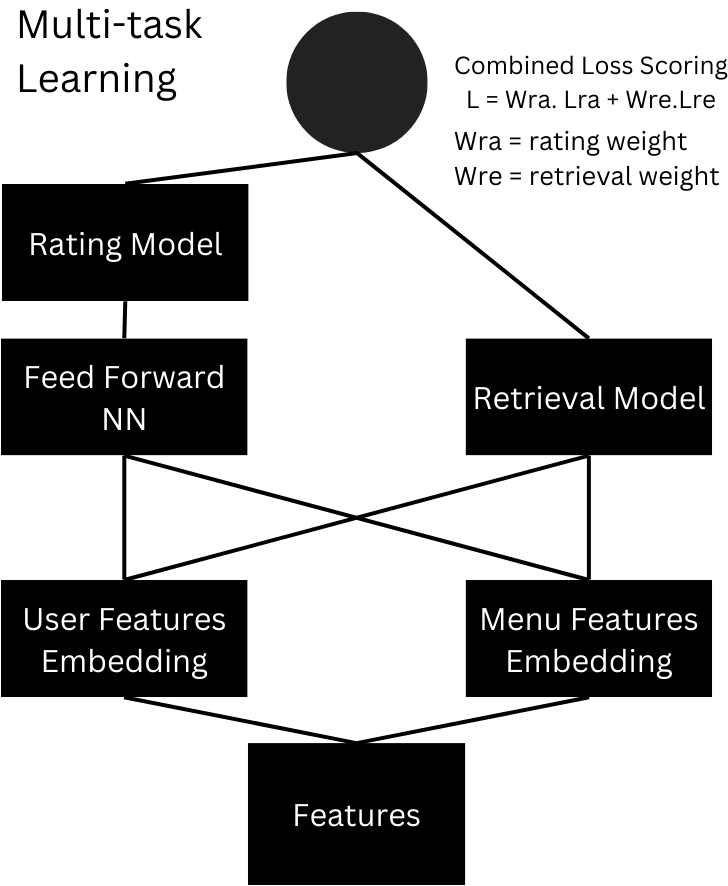

In [ ]:
users = tf.data.Dataset.from_tensor_slices(dict(user_menu_quantities[["user_id", "menu_id", "quantity"]]))
menus = tf.data.Dataset.from_tensor_slices(dict(df[['menu_id']]))

In [ ]:
users = users.map(lambda x: {
    "user_id": x["user_id"],
    "menu_id": x["menu_id"],
    "quantity": float(x["quantity"])
})
menus = menus.map(lambda x: x["menu_id"])

In [ ]:
print('Total Data: {}'.format(len(users)))

Total Data: 17937


In [ ]:
shuffled = users.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

I am not sure the best way to split the data, this could however be done by first splitting the unique user_ids first into train and test then use all the train with train user_id and the rest for test. But for now I just take the 14_000 randomly

In [ ]:
train = users.take(14_000) #train data used to train model
test = users.skip(14_000).take(3_937) #test data used to evaluate model

In [ ]:
#batching
menu_ids = menus.batch(1_000)
user_ids = users.batch(1_000).map(lambda x: x["user_id"])

#unique values
unique_menu_ids = np.unique(np.concatenate(list(menu_ids)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

We use multi-objective approach that applies both implicit (user transaction) and explicit signals (scaled total quantities=rating). In the end, we can predict what menus should the user order along with the given ranking-quantities corresponds to historical data

Here we see that we generate 2 models for two different task with combined loss function. 2 of those tasks are rating task and retrieval task:
Rating Task:

- Objective: The primary objective of the rating task is to predict user-item interactions, typically represented as ratings or preferences (total qty). The goal is to estimate how a user would rate a specific item they have not interacted with yet.

- Use Case: Rating (scaled total qty) predictions are useful when you want to provide users with estimated ratings for items they haven't seen or rated before. This is common in scenarios where explicit user feedback (such as numerical ratings) is available.

- Loss Function: The loss function for the rating task is typically a regression loss, such as mean squared error (MSE) or mean absolute error (MAE). These loss functions measure the discrepancy between predicted rating and actual ratings (total qty for our case).

- Training Objective: The rating task aims to minimize the difference between predicted ratings and actual ratings. By optimizing this objective, the model learns to estimate user preferences accurately.

Retrieval Task:

- Objective: The primary objective of the retrieval task is to generate a ranked list of items that are likely to be relevant to a user. This list is generated based on the user's historical interactions and preferences.

- Use Case: Retrieval tasks are useful when explicit ratings are not available, or when the focus is on generating personalized lists of recommendations for users based on their historical behavior.

- Loss Function: The loss function for the retrieval task measures the quality of the recommended list. Metrics like Top-K accuracy are commonly used to evaluate how well the recommended items match the user's actual interactions.

- Training Objective: The retrieval task aims to improve the ranking quality of the recommended items. By optimizing this objective, the model learns to generate better-ranked lists of items for users.

In [ ]:
class MenuModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights. This weight tuning could be
    # utilized after doing the customer segmentation by adding more models and embeddings

    super().__init__()

    embedding_dimension = 64

    # User and movie models.
    self.menu_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_menu_ids) + 1, embedding_dimension)
    ]) #used as an encoding method for each menu_ids
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ]) #used as an encoding method for each user_ids

    # A small model to take in user and menu embeddings and predict quantities-rankings.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=menus.batch(128).map(self.menu_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["user_id"])
    # And pick out the menu features and pass them into the menu model.
    menu_embeddings = self.menu_model(features["menu_id"])

    return (
        user_embeddings,
        menu_embeddings,
        # We apply the multi-layered rating model to a concatentation of
        # user and menu embeddings.
        self.rating_model(
            tf.concat([user_embeddings, menu_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("quantity")

    user_embeddings, menu_embeddings, rating_predictions = self(features)

    # We compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, menu_embeddings)

    # And combine them using the loss weights.
    return (self.rating_weight * rating_loss
            + self.retrieval_weight * retrieval_loss)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint('recommendation.h5',
                                              monitor='total_loss',
                                              save_best_only=True, verbose=1)
#defining a callback to only save the best training result in case I need it for certain situations

In [ ]:
model = MenuModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

model.fit(cached_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 66s 5s/step - root_mean_squared_error: 2.6039 - factorized_top_k/top_1_categorical_accuracy: 4.2857e-04 - factorized_top_k/top_5_categorical_accuracy: 4.2857e-04 - factorized_top_k/top_10_categorical_accuracy: 4.2857e-04 - factorized_top_k/top_50_categorical_accuracy: 4.2857e-04 - factorized_top_k/top_100_categorical_accuracy: 0.0010 - loss: 6857.3687 - regularization_loss: 0.0000e+00 - total_loss: 6857.3687
Epoch 2/10
14/14 [==============================] - 68s 5s/step - root_mean_squared_error: 2.5564 - factorized_top_k/top_1_categorical_accuracy: 0.0050 - factorized_top_k/top_5_categorical_accuracy: 0.0050 - factorized_top_k/top_10_categorical_accuracy: 0.0050 - factorized_top_k/top_50_categorical_accuracy: 0.0102 - factorized_top_k/top_100_categorical_accuracy: 0.0204 - loss: 6197.1910 - regularization_loss: 0.0000e+00 - total_loss: 6197.1910
Epoch 3/10
14/14 [==============================] - 70s 5s/step - root_mean_squared_erro

For now I will stop at 10 epoch so that I could do the other assignments, and this model will further enhanced later so there is no need to train the initial model for too long, this is an example

In [ ]:
metrics = model.evaluate(cached_test, return_dict=True)

print(f"\nRetrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}")

4/4 [==============================] - 13s 3s/step - root_mean_squared_error: 2.7629 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 7.6200e-04 - factorized_top_k/top_50_categorical_accuracy: 0.0018 - factorized_top_k/top_100_categorical_accuracy: 0.0033 - loss: 6733.5970 - regularization_loss: 0.0000e+00 - total_loss: 6733.5970

Retrieval top-100 accuracy: 0.003
Ranking RMSE: 2.763


Apparently the model is overfitting, means it require more variative data to function, this could be done by reviewing the training data variance or generating data with good variance.



In [ ]:
model.save_weights('recommendation.h5')

In [ ]:
def predict_menu(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # recommends movies out of the entire movies dataset.
    index.index_from_dataset(
      tf.data.Dataset.zip((menus.batch(100), menus.batch(100).map(model.menu_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))

    print('Top {} menu recommendations for user {}:\n'.format(top_n, user))
    for i, menuids in enumerate(titles[0, :top_n].numpy()):
        print('{}. {}'.format(i+1, menuids.decode("utf-8")))

def predict_quantity(user, menu):
    trained_menu_embeddings, trained_user_embeddings, predicted_rating = model({
          "user_id": np.array([str(user)]),
          "menu_id": np.array([menu])
      })
    print("Predicted quantity for {}: {}".format(menu, predicted_rating.numpy()[0][0]))

In [ ]:
predict_menu('00b158ed-0fcb-48e1-b627-2bb572a344cf', 5)

Top 5 menu recommendations for user 00b158ed-0fcb-48e1-b627-2bb572a344cf:

1. 676fcee3-a2d8-4cbf-8061-5d2b10cecfbc
2. 676fcee3-a2d8-4cbf-8061-5d2b10cecfbc
3. 4a90d4fc-a042-46db-8893-422e52a221c6
4. fe1bbdc2-15a5-4c95-aa51-079b11ae94a1
5. fe1bbdc2-15a5-4c95-aa51-079b11ae94a1


Another model that utilize timestamp and menu_type

In [ ]:
'''import tensorflow as tf
import tensorflow_recommenders as tfrs

# Define your feature columns
user_id = tf.feature_column.categorical_column_with_identity("user_id", num_buckets=num_users)
menu_id = tf.feature_column.categorical_column_with_identity("menu_id", num_buckets=num_menus)
menu_type = tf.feature_column.categorical_column_with_vocabulary_list("menu_type", menu_types)
timestamp = tf.feature_column.numeric_column("timestamp")

# Define your model
class RecommendationModel(tfrs.Model):
    def __init__(self):
        super().__init__()
        self.embedding_user = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim)
        self.embedding_menu = tf.keras.layers.Embedding(input_dim=num_menus, output_dim=embedding_dim)
        self.embedding_menu_type = tf.keras.layers.Embedding(input_dim=num_menu_types, output_dim=embedding_dim)
        self.embedding_timestamp = tf.keras.layers.Dense(embedding_dim)
        self.task = tfrs.tasks.Retrieval()

    def call(self, features):
        user_embeddings = self.embedding_user(features["user_id"])
        menu_embeddings = self.embedding_menu(features["menu_id"])
        menu_type_embeddings = self.embedding_menu_type(features["menu_type"])
        timestamp_embeddings = self.embedding_timestamp(features["timestamp"])

        menu_combined = tf.concat([menu_embeddings, menu_type_embeddings], axis=1)
        menu_combined += timestamp_embeddings

        return user_embeddings, menu_combined

model = RecommendationModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))
model.fit(train_data)

# Evaluate and make recommendations
eval_results = model.evaluate(eval_data)
user_embeddings = model.embedding_user(tf.constant(user_ids))
menu_embeddings = model.embedding_menu(tf.constant(menu_ids))'''


# Customer Segmentation

We will do a customer segmentation task for customer classifications features to be used on recommendation model and promotional campaign. Please (mercy me) keep in mind that I may have some more ideas for customer segmentation that I have not used yet probably because I have to make sure I have to get things done first :)

Through this provide product recommendations on **a micro-segment level**

## Purchase Behaviour

### Overall User Purchasing Behaviour

I plan to make a classifier for:
"Returning Frequent Buyer," "Declining Frequent Buyer," "Consistent Frequent Buyer," "Occasional Buyer," "New Buyer". This comes with certain challenges especially to differentiate between "Returning Frequent Buyer," and "Occasional Buyer", since returning frequent buyer is supposedly the target for promotions to go back being a frequent buyer. With the priority of promotion/voucher being

1. Declining Frequent Buyer
2. Returning Frequent Buyer
3. Consistent Frequent Buyer
4. New Buyer
5. Occasional Buyer

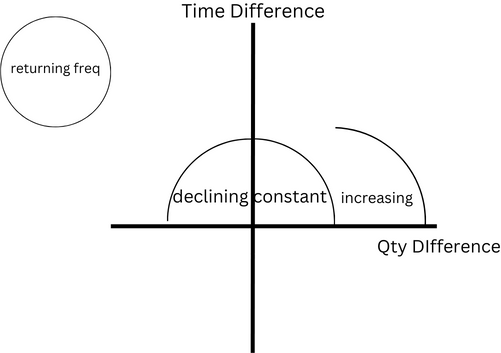

The easiest way or most effective way I could imagine for this is to define/generate the buyer classification in a fixed way ourselves, then we try it using our own generated classification to train a model so there is no more fixed rule. To my experience the best way I know to do this is to generate a data of our own using randomized method so the data we have is variative enough and accurate

However for time effectiveness (and since the data I have here is only 3 months data,) I shall just use the data we have and classify it as either

**Frequent and Occasional Buyer**
and

**Consistent, Increasing, Declining Buyer**

Through that classification we could have some decision regarding promotions and voucher, in which i believe the order-rank of promotion and voucher for them (currently without analysis since there is no promo-voucher dataset) are
1. declining frequent
2. consistent frequent
3. increasing frequent
4. increasing occasional
5. consistent occasional
6. declining occasional

I believe I could not find returning Frequent buyer since we only have 3 months data however if needed we could utilize the day difference between last transaction and current transaction

#### Frequent vs (Mid) vs Occasional Buyer

In [ ]:
# Calculate user-level features: total quantity for each user in each month
user_features = df.groupby(['user_id', 'month'])['quantity'].sum().reset_index()

In [ ]:
user_features

,user_id,month,quantity
0,00b158ed-0fcb-48e1-b627-2bb572a344cf,1,37.0
1,00b158ed-0fcb-48e1-b627-2bb572a344cf,2,26.0
2,00b158ed-0fcb-48e1-b627-2bb572a344cf,3,10.0
3,00bafc5b-3e97-439c-8b1f-9a6568adbaaa,1,38.0
4,00bafc5b-3e97-439c-8b1f-9a6568adbaaa,2,6.0
...,...,...,...
1639,ff39dbcb-4414-45b3-8fa0-92577d1c78b8,1,3.0
1640,ff39dbcb-4414-45b3-8fa0-92577d1c78b8,3,5.0
1641,ffde4412-810f-4800-a40b-27ad2a614a9e,1,49.0
1642,ffde4412-810f-4800-a40b-27ad2a614a9e,2,75.0


In [ ]:
data_reshaped = user_features["quantity"].values.reshape(-1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

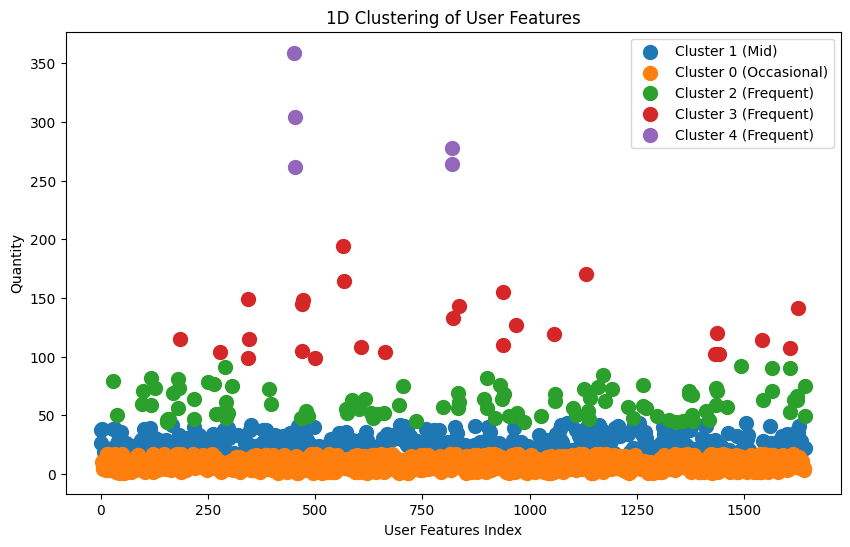

In [ ]:
# Choose the number of clusters
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_reshaped)

# Map cluster labels to numerical values
cluster_mapping = {
    0: 0,
    3: 1,
    1: 2,
    4: 3,
    2: 4
}

user_features['cluster'] = clusters

# Apply the cluster mapping to the 'cluster' column
user_features['cluster'] = user_features['cluster'].map(cluster_mapping)

# Create a custom legend with cluster labels
unique_clusters = user_features['cluster'].unique()
legend_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

# Visualize the clustering
plt.figure(figsize=(10, 6))

# Define cluster labels based on the numerical values
cluster_mapping = {
    0: 'Cluster 0 (Occasional)',
    1: 'Cluster 1 (Mid)',
    2: 'Cluster 2 (Frequent)',
    3: 'Cluster 3 (Frequent)',
    4: 'Cluster 4 (Frequent)'
}

user_features['cluster_label'] = user_features['cluster'].map(cluster_mapping)

# Visualize the clustering
plt.figure(figsize=(10, 6))

unique_cluster_labels = user_features['cluster_label'].unique()

for label in unique_cluster_labels:
    cluster_data = user_features[user_features['cluster_label'] == label]
    plt.scatter(cluster_data.index, cluster_data['quantity'], label=label, s=100)

plt.xlabel('User Features Index')
plt.ylabel('Quantity')
plt.title('1D Clustering of User Features')
plt.legend()
plt.show()

Let's define

0 as occasional
1 as mid
2 to 4 as frequent

#### Consistent vs Declining vs Increasing

Previously I thought I would use 2 variables that is time difference (from the latest purchase to current purchase) and quantity difference (could use difference between the mean of current 3 months data and mean of latest transaction 3 months data) to understand which one is a returning buyer however we only have 3 months data, so I am only using the quantity difference data (an overall latest 1 month difference)

In [ ]:
# Calculate user-level features: total quantity for each user in each month
user_features2 = df.groupby(['user_id', 'month'])['quantity'].sum().reset_index()

In [ ]:
# Create a DataFrame with all possible user-month combinations
all_user_ids = user_features2['user_id'].unique()
all_months = [1, 2, 3]
all_combinations = [(user_id, month) for user_id in all_user_ids for month in all_months]

new_data = []
for user_id, month in all_combinations:
    matching_rows = user_features2[(user_features2['user_id'] == user_id) & (user_features2['month'] == month)]
    if matching_rows.empty:
        new_data.append({'user_id': user_id, 'month': month, 'quantity': 0.0})
    else:
        new_data.extend(matching_rows.to_dict('records'))

new_user_features = pd.DataFrame(new_data)
#in case a user does not do any transaction for a month then create a new row with 0 value

In [ ]:
new_user_features['quantity_difference'] = new_user_features.groupby('user_id')['quantity'].diff()

In [ ]:
difference = new_user_features[new_user_features['month'] != 1]

In [ ]:
difference = difference.drop(columns=['quantity'])

In [ ]:
difference

,user_id,month,quantity_difference
1,00b158ed-0fcb-48e1-b627-2bb572a344cf,2,-11.0
2,00b158ed-0fcb-48e1-b627-2bb572a344cf,3,-16.0
4,00bafc5b-3e97-439c-8b1f-9a6568adbaaa,2,-32.0
5,00bafc5b-3e97-439c-8b1f-9a6568adbaaa,3,-6.0
7,00cf8833-2cd5-40df-8477-3e9b73dbdb66,2,-4.0
...,...,...,...
2993,ff13b265-54d4-48c4-8b51-f2e29e024e54,3,-22.0
2995,ff39dbcb-4414-45b3-8fa0-92577d1c78b8,2,-3.0
2996,ff39dbcb-4414-45b3-8fa0-92577d1c78b8,3,5.0
2998,ffde4412-810f-4800-a40b-27ad2a614a9e,2,26.0


In [ ]:
df['month'].unique()

array([1, 3, 2])

In [ ]:
qty_reshaped = difference["quantity_difference"].values.reshape(-1, 1)

In [ ]:
num_clusters = 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


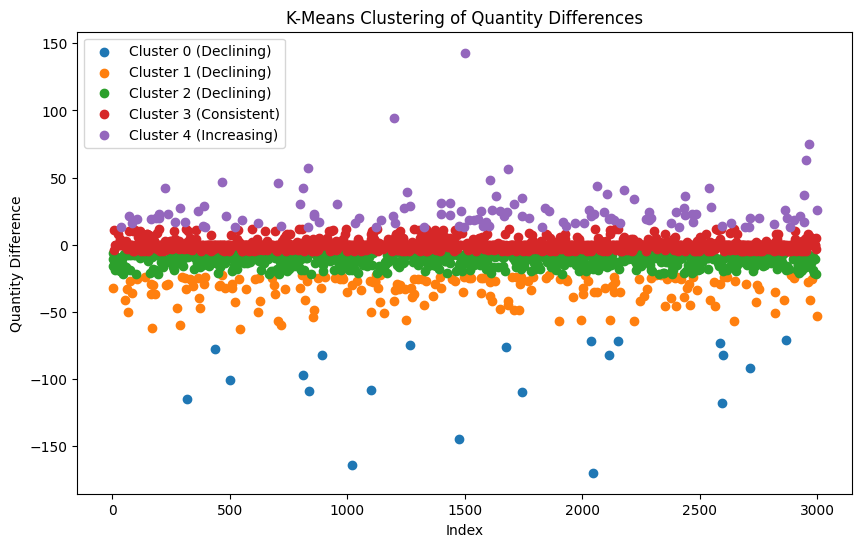

In [ ]:
kmeanscdi = KMeans(n_clusters=num_clusters, random_state=42)
clusterscdi = kmeanscdi.fit_predict(qty_reshaped)

# Add cluster labels to the DataFrame
difference['cluster'] = clusterscdi

# Map cluster labels to numerical values
cluster_mapping = {
    2: 0,
    3: 1,
    0: 2,
    1: 3,
    4: 4
}

# Apply the cluster mapping to the 'cluster' column
difference['cluster'] = difference['cluster'].map(cluster_mapping)

# Plotting
plt.figure(figsize=(10, 6))

# Define cluster labels based on the numerical values
numerical_cluster_labels = {
    0: 'Cluster 0 (Declining)',
    1: 'Cluster 1 (Declining)',
    2: 'Cluster 2 (Declining)',
    3: 'Cluster 3 (Consistent)',
    4: 'Cluster 4 (Increasing)'
}

for cluster, label in numerical_cluster_labels.items():
    cluster_data = difference[difference['cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['quantity_difference'], label=label)

plt.title('K-Means Clustering of Quantity Differences')
plt.xlabel('Index')
plt.ylabel('Quantity Difference')
plt.legend()
plt.show()

In [ ]:
difference

,user_id,month,quantity_difference,cluster
1,00b158ed-0fcb-48e1-b627-2bb572a344cf,2,-11.0,2
2,00b158ed-0fcb-48e1-b627-2bb572a344cf,3,-16.0,2
4,00bafc5b-3e97-439c-8b1f-9a6568adbaaa,2,-32.0,1
5,00bafc5b-3e97-439c-8b1f-9a6568adbaaa,3,-6.0,2
7,00cf8833-2cd5-40df-8477-3e9b73dbdb66,2,-4.0,3
...,...,...,...,...
2993,ff13b265-54d4-48c4-8b51-f2e29e024e54,3,-22.0,2
2995,ff39dbcb-4414-45b3-8fa0-92577d1c78b8,2,-3.0,3
2996,ff39dbcb-4414-45b3-8fa0-92577d1c78b8,3,5.0,3
2998,ffde4412-810f-4800-a40b-27ad2a614a9e,2,26.0,4


We shall consider
- cluster 3 as consistent
- cluster 4 as increasing
- cluster 0, 1, 2 as declining


However using clustering method such as this does not utilize the use time variable properly since it only understand the difference between each month, although it may possible using moving average or mean and other methods however it does not truly understand the time variable. So it is better to use deep learning method such as LSTM using a generated variative data to make a supervised learning model and fine tune it using the actual data, however this requires the stakeholder knowledge for the required data and each customer supposed classification and behaviour

#### Combined

However even without several data (for several user each has a lot of data), generated data (requires consultation with stakeholders). It is possible to understand returning frequent buyer through a logistic function that combines both classification result. It can be adapted based on the stakeholder decision

Frequent vs Occasional

I am using logistic function to make it work as a mean value, because of the concave-up behavior (making it easier to decrease values in the middle range) and concave-down behavior (making it harder to decrease values once they are high) so that a former-frequent user does not immedietly classified as occasional user. This works well to find user that is classified as **returning frequent buyer** which in this case

**returning frequent buyer** == declining frequent buyer

In [ ]:
def logistic_weight(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

In [ ]:
def combine_values(values, L, k, x0):
    normalized_values = [v / 4.0 for v in values]  # Normalize values to 0-1 range
    weights = [logistic_weight(v, L, k, x0) for v in normalized_values]
    weighted_sum = sum(w * v for w, v in zip(weights, values))
    total_weight = sum(weights)
    combined_value = weighted_sum / total_weight
    return combined_value

#example
values = [4, 4, 3, 2, 3]
L = 1.0  # You can adjust this value
k = 1.0  # You can adjust this value
x0 = 0.5  # You can adjust this value

combined_result = combine_values(values, L, k, x0)
print("Combined Value:", combined_result)

Combined Value: 3.259619425969488


In [ ]:
user_rankings = user_features[user_features['user_id'] == '00b158ed-0fcb-48e1-b627-2bb572a344cf'].sort_values(by='month', ascending=False)

In [ ]:
combine_values(user_rankings['cluster'].values, 1.0, 1.0, 0.5)

0.6987357291075648

In [ ]:
def user_first_behaviour(user_id, n, user_features):
  #user_id
  #n is number to choose n latest customer with id=user_id segmentation score you want to combine
  user_rankings = user_features[user_features['user_id'] == '00b158ed-0fcb-48e1-b627-2bb572a344cf'].sort_values(by='month', ascending=False)
  if len(user_rankings['cluster'].values) == 0:
    response = {"code": 404, "error": "could not find transaction", "message": "could not find transaction"}
  elif len(user_rankings['cluster'].values) < n:
    response = {"code": 404, "error": "n exceed user data length", "message": "n exceed user data length"}
  else:
    response = combine_values(user_rankings['cluster'].values[:n], 1.0, 1.0, 0.5)
  return response

In [ ]:
user_first_behaviour('00b158ed-0fcb-48e1-b627-2bb572a344cf', 3, user_features)

0.6987357291075648

Now we will now combine the frequent vs occasional with Consistent vs Declining vs Increasing

It is actually possible too to make a scoring function or model based on both 0 to 4 scoring from those 2 models using deep learning with the variables optimized for best voucher or promotion decision score-profit system, it might be quite complex, so I will not simulate that for now

In [ ]:
def user_second_behaviour(user_id, n, difference): #we will be using SQLAlchemy if I have enough time to make the API
  user_rankings = difference[difference['user_id'] == user_id].sort_values(by='month', ascending=False)
  if len(user_rankings['cluster'].values) == 0:
    response = {"code": 404, "error": "could not find transaction", "message": "could not find transaction"}
  elif len(user_rankings['cluster'].values) < n:
    response = {"code": 404, "error": "n exceed user data length", "message": "n exceed user data length"}
  else:
    response = combine_values(user_rankings['cluster'].values[:n], 1.0, 1.0, 0.5)
  return response

In [ ]:
user_second_behaviour('00b158ed-0fcb-48e1-b627-2bb572a344cf', 2, difference)

2.0

In [ ]:
def combine_behaviors(user_id, n, user_features):
    # Define mappings for first function
    first_output = round(user_first_behaviour(user_id, n, user_features))
    second_output = round(user_second_behaviour(user_id, n-1, user_features))

    first_mapping = {
        0: 'occasional',
        1: 'mid',
        2: 'frequent',        #does not actually mean normal but rather mid-scale
        3: 'frequent',
        4: 'frequent'
    }

    # Define mappings for second function outputs
    second_mapping = {
        0: 'declining',
        1: 'declining',
        2: 'declining',
        3: 'consistent',
        4: 'increasing'
    }

    # Combine the outputs
    combined_output = f"{second_mapping[second_output]} {first_mapping[first_output]}"

    return combined_output

In [ ]:
combine_behaviors('00b158ed-0fcb-48e1-b627-2bb572a344cf', 2, user_features)

'declining mid'

We could conclude that user '00b158ed-0fcb-48e1-b627-2bb572a344cf' is declining mid user

Remember that we could utilize these value from the segmentation to make a model combined with other variables such as user_tier or even location to make rewards-promotion model for users

### User Active Hour

This Classification can be used to identify user's most active hour for purchasing, this could be used for notification schedule for the company's mobile app

In [ ]:
# Calculate user-level features: total quantity for each user in each hour
user_features_hour = df.groupby(['user_id', 'hour'])['quantity'].sum().reset_index()

In [ ]:
user_features_hour

,user_id,hour,quantity
0,00b158ed-0fcb-48e1-b627-2bb572a344cf,10,9.0
1,00b158ed-0fcb-48e1-b627-2bb572a344cf,11,11.0
2,00b158ed-0fcb-48e1-b627-2bb572a344cf,12,12.0
3,00b158ed-0fcb-48e1-b627-2bb572a344cf,13,1.0
4,00b158ed-0fcb-48e1-b627-2bb572a344cf,14,7.0
...,...,...,...
2509,ffde4412-810f-4800-a40b-27ad2a614a9e,16,3.0
2510,ffde4412-810f-4800-a40b-27ad2a614a9e,18,79.0
2511,ffde4412-810f-4800-a40b-27ad2a614a9e,19,48.0
2512,ffde4412-810f-4800-a40b-27ad2a614a9e,20,10.0


In [ ]:
data_reshaped2 = user_features["quantity"].values.reshape(-1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


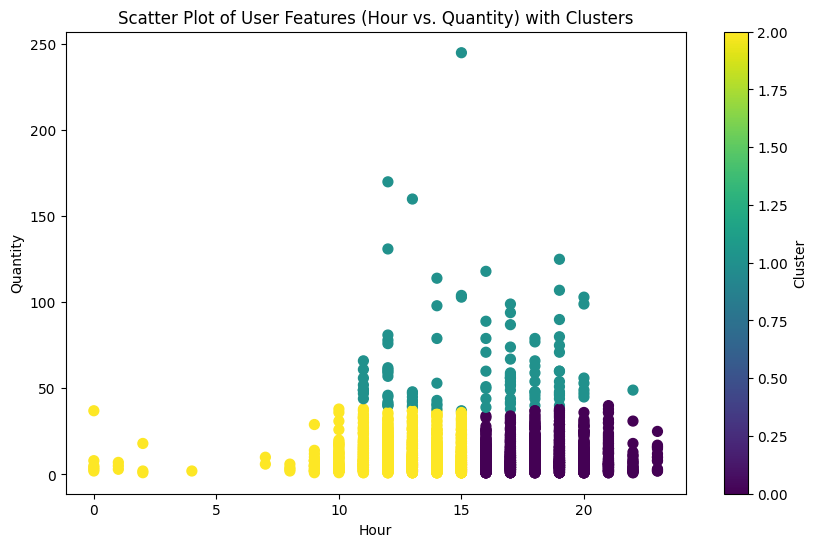

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already calculated user_features_hour and performed K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Create separate scalers for each feature
scaler_hour = StandardScaler()
scaler_quantity = StandardScaler()

# Scale each feature separately
user_features_hour['scaled_hour'] = scaler_hour.fit_transform(user_features_hour[['hour']])
user_features_hour['scaled_quantity'] = scaler_quantity.fit_transform(user_features_hour[['quantity']])
clusters = kmeans.fit_predict(user_features_hour[['scaled_hour','scaled_quantity']])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_features_hour['hour'], user_features_hour['quantity'], c=clusters, cmap='viridis', s=50)
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title('Scatter Plot of User Features (Hour vs. Quantity) with Clusters')
plt.colorbar(label='Cluster')
plt.show()

**It does not seem to accurately understand user's behaviour and I believe it is better to use Sequential DL instead that is able to memorize user's hour buying pattern instead of this**

## Item Recommendation based on Place Popularity (Item-Place Segmentation)

Place analysis, through this provide product recommendations on **a micro-segment level** that is location. So from these place segmentation we could probably assume the brands that are located and popular in a specific city.

This place segmentation could be useful for our recommendation model so that our recommendation model only shows menus from brands around their nearby (city)

### Most Popular Brand per District

Unfortunately I do not know how far each branch or brands to the other brand, It does not seem like I could utilize geographic (map with longitude altitude ect) segmentation to enhance our recommendation model

In [ ]:
# Group data by district and brand, then count purchases for each brand within each district
grouped_data = df.groupby(['district', 'brand']).size().reset_index(name='purchase_count')

# Sort the data within each district by purchase count in descending order
grouped_data = grouped_data.sort_values(['district', 'purchase_count'], ascending=[True, False])

# Display the top 5 brands for each district
top_brands_per_district = grouped_data.groupby('district').head(10)

print(top_brands_per_district)

          district          brand  purchase_count
1            Andir            TPC              94
0            Andir       Djournal              36
2   Babakan Madang            TPC              26
4             Beji            TPC              73
3             Beji       Djournal              70
..             ...            ...             ...
83          Wiyung       Djournal             201
84          Wiyung    Kitchenette             174
87          Wiyung    Tokyo Belly             109
85          Wiyung  Pizza E Birra              71
86          Wiyung            TPC              58

[88 rows x 3 columns]


In [ ]:
selected_district = 'Andir'

# Filter the top brands DataFrame to show results for the selected district
top_brands_selected_district = top_brands_per_district[top_brands_per_district['district'] == selected_district]

# Display the top brand for the selected district
print(top_brands_selected_district)

  district     brand  purchase_count
1    Andir       TPC              94
0    Andir  Djournal              36


Now we know that the most popular brand around Andir are these, and possibly the only stores around Andir are these, so possibly, the menus that we most likely plan to recommend around Andir are these

From this information we could utilize the menu recommendation based on the most popular brand in the customer's district

In [ ]:
n = 5

In [ ]:
top_n_brands_selected_district = top_brands_selected_district.head(n)

# Initialize an empty DataFrame to store the results
top_menus_dataframe = pd.DataFrame(columns=['brand', 'menu_id', 'menu_name', 'purchase_count'])

# Iterate through the top n brands and find the top 5 popular menus for each brand
for index, row in top_n_brands_selected_district.iterrows():
    brand = row['brand']
    brand_data = df[(df['district'] == selected_district) & (df['brand'] == brand)]
    grouped_menu_data = brand_data.groupby(['brand', 'menu_id', 'menu_name']).size().reset_index(name='purchase_count')
    top_menus_brand = grouped_menu_data.sort_values('purchase_count', ascending=False).head(n)
    top_menus_dataframe = top_menus_dataframe.append(top_menus_brand, ignore_index=True)

<ipython-input-62-5888f8351969>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_menus_dataframe = top_menus_dataframe.append(top_menus_brand, ignore_index=True)
<ipython-input-62-5888f8351969>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_menus_dataframe = top_menus_dataframe.append(top_menus_brand, ignore_index=True)


In [ ]:
top_menus_dataframe

,brand,menu_id,menu_name,purchase_count
0,TPC,44ac93ad-6fb2-4552-9c80-14a0feb45928,Pedas,15
1,TPC,d1fde11e-4753-4c65-ba85-d9cbb9ead955,Mie Tek Tek Pak Min,8
2,TPC,bd43ce4b-cc05-4d09-a352-6397e7e1ca18,Nasi Goreng Gila,7
3,TPC,434df06a-f1a2-4deb-ae7c-7345a6918e77,Soto Mie Bogor,5
4,TPC,fc380efb-b11e-4139-bd05-838391f18771,Pastel Bude 12K/Pcs,4
5,Djournal,ff528a77-82fb-4dbf-a992-a5181a237550,Regular,6
6,Djournal,624764be-520c-4b8b-8472-0aadb155f604,Hot Premium Tea,6
7,Djournal,eb3e20d2-caa3-4ada-a351-fdd94cc5a27d,Jasmine Green Tea,5
8,Djournal,d4dfc119-8434-4b9b-8248-928640af6c55,Djournal Thai Tea 12 Oz,2
9,Djournal,8600d9de-5274-43b7-9e5e-b790379396f0,Extra 1 Espresso Shoot,1


In the end we could classify which items are more likely recommended for a specific district

### Most Popular Brand per City

Same case however on a bigger scale (city)

In [ ]:
# Group data by city and brand, then count purchases for each brand within each district
grouped_data = df.groupby(['city', 'brand']).size().reset_index(name='purchase_count')

# Sort the data within each district by purchase count in descending order
grouped_data = grouped_data.sort_values(['city', 'purchase_count'], ascending=[True, False])

# Display the top 10 brands for each city
top_brands_per_city = grouped_data.groupby('city').head(10)

print(top_brands_per_city)

                 city            brand  purchase_count
2              Badung          Manarai             202
0              Badung         Djournal              14
1              Badung      Kitchenette               4
3              Badung    Pizza E Birra               4
4       Bandung, Kota         Djournal             994
7       Bandung, Kota              TPC             121
6       Bandung, Kota     Sushi Groove              21
5       Bandung, Kota    Pizza E Birra               9
9         Bogor, Kab.      Tokyo Belly              58
8         Bogor, Kab.              TPC              26
11           Denpasar              TPC             223
10           Denpasar         Djournal             173
13              Depok              TPC              73
12              Depok         Djournal              70
17      Jakarta Barat              TPC             349
15      Jakarta Barat      Kitchenette             300
14      Jakarta Barat         Djournal             274
16      Ja

In [ ]:
selected_city = 'Bandung, Kota'

# Filter the top brands DataFrame to show results for the selected district
top_brands_selected_city = top_brands_per_city[top_brands_per_city['city'] == selected_city]

# Display the top brand for the selected district
print(top_brands_selected_city)

            city          brand  purchase_count
4  Bandung, Kota       Djournal             994
7  Bandung, Kota            TPC             121
6  Bandung, Kota   Sushi Groove              21
5  Bandung, Kota  Pizza E Birra               9


In [ ]:
n = 5

In [ ]:
top_n_brands_selected_city = top_brands_selected_city.head(n)

# Initialize an empty DataFrame to store the results
top_menus_dataframe_city = pd.DataFrame(columns=['brand', 'menu_id', 'menu_name', 'purchase_count'])

# Iterate through the top n brands and find the top 5 popular menus for each brand
for index, row in top_n_brands_selected_city.iterrows():
    brand = row['brand']
    brand_data = df[(df['city'] == selected_city) & (df['brand'] == brand)]
    grouped_menu_data = brand_data.groupby(['brand', 'menu_id', 'menu_name']).size().reset_index(name='purchase_count')
    top_menus_brand = grouped_menu_data.sort_values('purchase_count', ascending=False).head(n)
    top_menus_dataframe_city = top_menus_dataframe_city.append(top_menus_brand, ignore_index=True)

<ipython-input-44-3861b7b42a84>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_menus_dataframe_city = top_menus_dataframe_city.append(top_menus_brand, ignore_index=True)
<ipython-input-44-3861b7b42a84>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_menus_dataframe_city = top_menus_dataframe_city.append(top_menus_brand, ignore_index=True)
<ipython-input-44-3861b7b42a84>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_menus_dataframe_city = top_menus_dataframe_city.append(top_menus_brand, ignore_index=True)
<ipython-input-44-3861b7b42a84>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_menus_dataframe_city = top_

In [ ]:
top_menus_dataframe_city

,brand,menu_id,menu_name,purchase_count
0,Djournal,76b2d827-8dac-4229-9290-e58fbcc79e62,No Whipped Cream,51
1,Djournal,a8e08bf4-5db3-4edd-b5cb-3d0a6b80723f,With Sugar (Standard),34
2,Djournal,bee9c394-3a53-4961-855f-f7afd33086d8,Iced Caramel Macchiato,27
3,Djournal,a343bc5c-9ca0-48f1-88b2-b18aa0955a7b,Reguler Milk Large,23
4,Djournal,7af7fa35-f843-4add-81f5-69a8da1858bb,Shaken Espresso Latte,23
5,TPC,44ac93ad-6fb2-4552-9c80-14a0feb45928,Pedas,16
6,TPC,d1fde11e-4753-4c65-ba85-d9cbb9ead955,Mie Tek Tek Pak Min,9
7,TPC,bd43ce4b-cc05-4d09-a352-6397e7e1ca18,Nasi Goreng Gila,7
8,TPC,fc380efb-b11e-4139-bd05-838391f18771,Pastel Bude 12K/Pcs,5
9,TPC,c06c35f8-3555-4a00-903d-0820bc0069d5,Ayam Geprek TPC,5


In [ ]:
def topBrandCity(city, df):
    # Group data by city and brand, then count purchases for each brand within each district
    grouped_data = df.groupby(['city', 'brand']).size().reset_index(name='purchase_count')

    # Sort the data within each city by purchase count in descending order
    grouped_data = grouped_data.sort_values(['city', 'purchase_count'], ascending=[True, False])

    # Filter the top brands DataFrame to show results for the selected city
    top_brands_selected_city = grouped_data[grouped_data['city'] == city]

    return top_brands_selected_city['brand']

I plan to use city as our segmentation knowledge to build a better recommendation model

# Refined Recommendation Model using Segmentation Knowledge

This Model will now include more features for both user related features and menu related features. After that we will utilize our Item-Place Segmentation for the last recommendation

Supposedly we must have an exclusive model (read: weights and data) for every district or city and then for every users inside the city based on their previous transaction then make it as an API for our model. However as of now, I will demonstrate the model generally which later can be used to be fine tuned by user own datas.

Also, I am changing the menu_id into menu_name because it is more readable

Note that year is not a relevant feature here because there is only 2023 here with 3 months worth of data, and possibly there are not much season difference between january to march (both are rain season). So for now I will not include the month feature

Note that it is also possible to add user purchase behaviour as another feature to our user dataset.

I'll be honest, I am still learning recommendation as of now, so there might be some wrong practices here. But I understand the basic and the logic of some recommendation models well, but I am not yet accustomed with the coding. So please mercy me, I believe I could learn much more such as combining BERT4Rec :)

## Previous Recommendation Model with Segmentation Knowledge

Most explanation has already been explained in the previous recommendation model section

In [ ]:
user_menu_quantities = df.groupby(["user_id", "menu_name"])["quantity"].sum().reset_index()

In [ ]:
users = tf.data.Dataset.from_tensor_slices(dict(user_menu_quantities[["user_id", "menu_name", "quantity"]]))
menus = tf.data.Dataset.from_tensor_slices(dict(df[['menu_name']]))

In [ ]:
users = users.map(lambda x: {
    "user_id": x["user_id"],
    "menu_name": x["menu_name"],
    "quantity": float(x["quantity"])
})
menus = menus.map(lambda x: x["menu_name"])

In [ ]:
shuffled = users.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

In [ ]:
train = users.take(14_000) #train data used to train model
test = users.skip(14_000).take(3_937) #test data used to evaluate model

In [ ]:
#batching
menu_names = menus.batch(1_000)
user_ids = users.batch(1_000).map(lambda x: x["user_id"])

#unique values
unique_menu_names = np.unique(np.concatenate(list(menu_names)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

In [ ]:
print(len(unique_menu_names) + 1)

2031


In [ ]:
unique_menu_names

array([b' ++Rich Syrup', b' Truffle Butter Chicken Arrosto',
       b'(2B) Balvenie 12', ..., b'Yuzu Ramos', b'on The side',
       b'\xe2\x80\x9cMr.Fox Signature - Iced Tea\xe2\x80\x9d'],
      dtype=object)

In [ ]:
len(unique_menu_names) + 1

2031

Since I understand the model, I could also adapt this model to PyTorch if needed

In [ ]:
class MenuModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights. This weight tuning could be
    # utilized after doing the customer segmentation by adding more models and embeddings

    super().__init__()

    embedding_dimension = 64

    # User and movie models.
    self.menu_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_names, mask_token=None),
      tf.keras.layers.Embedding(len(unique_menu_names) + 1, embedding_dimension)
    ]) #used as an encoding method for each menu_ids
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ]) #used as an encoding method for each user_ids

    # A small model to take in user and menu embeddings and predict quantities-rankings.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=menus.batch(128).map(self.menu_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["user_id"])
    # And pick out the menu features and pass them into the menu model.
    menu_embeddings = self.menu_model(features["menu_name"])

    return (
        user_embeddings,
        menu_embeddings,
        # We apply the multi-layered rating model to a concatentation of
        # user and menu embeddings.
        self.rating_model(
            tf.concat([user_embeddings, menu_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("quantity")

    user_embeddings, menu_embeddings, rating_predictions = self(features)

    # We compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, menu_embeddings)

    # And combine them using the loss weights.
    return (self.rating_weight * rating_loss
            + self.retrieval_weight * retrieval_loss)

Here we see that we could do multiple task, for this case I am only doing two task for this model that is retrieval and ranking. However we could also make another model that add another task for instance a recommendation menu based on location and from that model during retraining for personalized user, we could even add a task to Recommend Menu based on Location with higher weight for that task. There are a lot of room to improve

In [ ]:
# Here we see that we could do multiple task, for this case I am only doing two task
model = MenuModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

model.fit(cached_train, epochs=20)

Epoch 1/20
14/14 [==============================] - 88s 6s/step - root_mean_squared_error: 2.6659 - factorized_top_k/top_1_categorical_accuracy: 5.0000e-04 - factorized_top_k/top_5_categorical_accuracy: 5.0000e-04 - factorized_top_k/top_10_categorical_accuracy: 5.0000e-04 - factorized_top_k/top_50_categorical_accuracy: 7.1429e-04 - factorized_top_k/top_100_categorical_accuracy: 0.0013 - loss: 6860.2235 - regularization_loss: 0.0000e+00 - total_loss: 6860.2235
Epoch 2/20
14/14 [==============================] - 67s 5s/step - root_mean_squared_error: 2.5970 - factorized_top_k/top_1_categorical_accuracy: 0.0049 - factorized_top_k/top_5_categorical_accuracy: 0.0049 - factorized_top_k/top_10_categorical_accuracy: 0.0049 - factorized_top_k/top_50_categorical_accuracy: 0.0094 - factorized_top_k/top_100_categorical_accuracy: 0.0184 - loss: 6270.7747 - regularization_loss: 0.0000e+00 - total_loss: 6270.7747
Epoch 3/20
14/14 [==============================] - 65s 5s/step - root_mean_squared_erro

In [ ]:
# Save model weights
model.save_weights("model_weights.h5")

The Model apperently could not be saved as a model instead only as weights for now, there are some possible ways to debug it, however I will go with this for now although it is not the best practice

In [ ]:
model = MenuModel(rating_weight=1.0, retrieval_weight=1.0)

In [ ]:
# Build the model by calling it with example inputs
dummy_features = {
    "user_id": tf.constant(["dummy_user"]),
    "menu_name": tf.constant(["dummy_menu"])
}
model(dummy_features)

(<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
 array([[-0.03101311, -0.02688022,  0.00577902,  0.01118592,  0.0134828 ,
          0.02278198, -0.03961341,  0.0397635 ,  0.04533876,  0.03805253,
          0.00059193, -0.00763641,  0.03852148, -0.02909929,  0.00567558,
          0.01164007,  0.02857424,  0.02051249,  0.03314557,  0.04151816,
         -0.00174358,  0.03617127, -0.02328476,  0.02988961, -0.00280922,
          0.03407964, -0.01932755, -0.00628173,  0.03095845, -0.03469466,
          0.0143664 , -0.04724402, -0.04984837,  0.04322645,  0.00163051,
          0.03717926,  0.0436816 , -0.00963377,  0.04989598,  0.04766624,
          0.03846829, -0.04306766, -0.01294593,  0.02119939,  0.04725621,
          0.02061242,  0.00454392, -0.01300987, -0.01824787,  0.01675233,
          0.00282732, -0.03195168,  0.03067314,  0.00428959,  0.0358688 ,
          0.01452242, -0.00430625, -0.04625224, -0.02935628, -0.00423523,
         -0.03288918, -0.02662664,  0.01443927, -0.00099512]],

In [ ]:
model.load_weights("model_weights.h5")

In [ ]:
metrics = model.evaluate(cached_test, return_dict=True)

print(f"\nRetrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}")

4/4 [==============================] - 15s 4s/step - root_mean_squared_error: 3.0195 - factorized_top_k/top_1_categorical_accuracy: 0.0016 - factorized_top_k/top_5_categorical_accuracy: 0.0016 - factorized_top_k/top_10_categorical_accuracy: 0.0022 - factorized_top_k/top_50_categorical_accuracy: 0.0033 - factorized_top_k/top_100_categorical_accuracy: 0.0041 - loss: 5931.1938 - regularization_loss: 0.0000e+00 - total_loss: 5931.1938

Retrieval top-100 accuracy: 0.004
Ranking RMSE: 3.020


In [ ]:
def topBrandCity(city, df): #most popular brand around their city
    # Group data by city and brand, then count purchases for each brand within each district
    grouped_data = df.groupby(['city', 'brand']).size().reset_index(name='purchase_count')

    # Sort the data within each city by purchase count in descending order
    grouped_data = grouped_data.sort_values(['city', 'purchase_count'], ascending=[True, False])

    # Filter the top brands DataFrame to show results for the selected city
    top_brands_selected_city = grouped_data[grouped_data['city'] == city]

    return top_brands_selected_city['brand']

# Usage
top_brands = topBrandCity('Bandung, Kota', df)
print(top_brands)

4         Djournal
7              TPC
6     Sushi Groove
5    Pizza E Birra
Name: brand, dtype: object


In [ ]:
def get_top_cities(user_id, df, top_n=3): #city where user mostly buy things from
    # Filter the data for the specified user
    user_data = df[df['user_id'] == user_id]

    # Group data by city and count purchases
    city_purchase_counts = user_data['city'].value_counts()

    # Get the top N cities with the most purchases
    top_cities = city_purchase_counts.head(top_n).index.tolist()

    return top_cities

In [ ]:
def predict_menu(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # Recommends menus out of the entire menus dataset.
    index.index_from_dataset(
        tf.data.Dataset.zip((menus.batch(100), menus.batch(100).map(model.menu_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))
    recommended_menu_ids = titles[0, :top_n * 100].numpy()  # Fetch more than top_n

    unique_menu_ids = set()  # To track unique menu recommendations
    unique_recommended_menu_ids = []

    print('Top {} unique menu recommendations for user {}:\n'.format(top_n, user))
    for menuid in recommended_menu_ids:
        menuid_str = menuid.decode("utf-8")
        if menuid_str not in unique_menu_ids:
            unique_menu_ids.add(menuid_str)
            unique_recommended_menu_ids.append(menuid_str)

            if len(unique_recommended_menu_ids) >= top_n:
                break

    for i, menuid_str in enumerate(unique_recommended_menu_ids):
        print('{}. {}'.format(i + 1, menuid_str))

# Usage:
predict_menu(user="00b158ed-0fcb-48e1-b627-2bb572a344cf", top_n=3)

Top 3 unique menu recommendations for user 00b158ed-0fcb-48e1-b627-2bb572a344cf:

1. Tahu goreng
2. Special Bundle Aqua 3
3. Special Bundle Aqua 1


In [ ]:
def predict_menu(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # Recommends menus out of the entire menus dataset.
    index.index_from_dataset(
        tf.data.Dataset.zip((menus.batch(100), menus.batch(100).map(model.menu_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))
    recommended_menu_ids = titles[0, :top_n * 100].numpy()  # Fetch more than top_n

    unique_menu_ids = set()  # To track unique menu recommendations
    unique_recommended_menu_ids = []

    for menuid in recommended_menu_ids:
        menuid_str = menuid.decode("utf-8")
        if menuid_str not in unique_menu_ids:
            unique_menu_ids.add(menuid_str)
            unique_recommended_menu_ids.append(menuid_str)

            if len(unique_recommended_menu_ids) >= top_n:
                break

    top_menu_recommendations = [
        {"rank": i + 1, "menu_id": menuid_str}
        for i, menuid_str in enumerate(unique_recommended_menu_ids)
    ]
    response = {
        "user_id": user,
        "top_menu_recommendations": top_menu_recommendations
    }
    return response

# Usage:
predict_menu(user="00b158ed-0fcb-48e1-b627-2bb572a344cf", top_n=3)

It seems like the user data must be trained by a specific city they are in. From the previous segmentation I am only using it to filter the end-result, however I guess it is not having that good of a result. However this is a way of utilizing the segmentation, however in the end It is better to retrain the model based on the user's city with better weights so that the model will lean towards the user's city

In [ ]:
'''def predict_menu(user, df, top_n=3): #predicting menu based on user's most transaction city, most popular brands around that city
    # Get the top cities where the user has made the most purchases
    top_cities = get_top_cities(user, df)

    # Get the top brand in the user's top city
    top_city = top_cities[0]  # Assuming you want the top city
    top_brand = topBrandCity(top_city, df).iloc[0]  # Assuming you want the top brand

    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # Recommends menus out of the entire menus dataset.
    index.index_from_dataset(
        tf.data.Dataset.zip((menus.batch(100), menus.batch(100).map(model.menu_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))
    titles_numpy = titles[0].numpy()  # Convert to NumPy array

    # Filter menu recommendations by the top brand in the top city
    filtered_titles = [
        title for title in titles_numpy if top_brand in title.decode("utf-8")
    ]

    print('Top {} menu recommendations for user {}:\n'.format(top_n, user))
    for i, menunames in enumerate(filtered_titles[:top_n]):
        print('{}. {}'.format(i+1, menunames.decode("utf-8")))

In [ ]:
'''predict_menu(user="ffde4412-810f-4800-a40b-27ad2a614a9e", df=df, top_n=5)

## Multiple-Embeddings Multi-Task Recommendation Model (experimental)

Through this we could see the model I plan to make however I still encounter some problems utilizing the model

In [ ]:
user_menu_quantities = df.groupby(["user_id", "menu_name"])["quantity"].sum().reset_index() #user total purchase per item

# Display the result
print(user_menu_quantities)

                                    user_id                       menu_name  \
0      00b158ed-0fcb-48e1-b627-2bb572a344cf                            12oz   
1      00b158ed-0fcb-48e1-b627-2bb572a344cf                      Aqua 330ml   
2      00b158ed-0fcb-48e1-b627-2bb572a344cf                 Ayam Bejo Julid   
3      00b158ed-0fcb-48e1-b627-2bb572a344cf         Ayam Geprek Sambal Limo   
4      00b158ed-0fcb-48e1-b627-2bb572a344cf     Baso Goreng Dadakan 12K/Pcs   
...                                     ...                             ...   
17673  ffde4412-810f-4800-a40b-27ad2a614a9e      Spiced GarlicBucket, Spicy   
17674  ffde4412-810f-4800-a40b-27ad2a614a9e              Thai Chicken Wings   
17675  ffde4412-810f-4800-a40b-27ad2a614a9e         Truffle Bikini Sandwich   
17676  ffde4412-810f-4800-a40b-27ad2a614a9e  Truffle Mushroom Classic Pizza   
17677  ffde4412-810f-4800-a40b-27ad2a614a9e                    Whiskey Sour   

       quantity  
0           1.0  
1           3.0

In [ ]:
gender_df = df[["user_id", "user_gender", "user_tier_level", 'menu_type', 'menu_category', 'menu_category_detail','concept', 'brand', 'outlet', 'district', 'city']]

# Merge gender information
user_menu_quantities = user_menu_quantities.merge(gender_df, on="user_id", how="left")

In [ ]:
users = tf.data.Dataset.from_tensor_slices(dict(user_menu_quantities[["user_id", "menu_name", "quantity", "user_gender", "user_tier_level", 'menu_type', 'menu_category', 'menu_category_detail','concept', 'brand', 'outlet', 'district', 'city']]))
menus = tf.data.Dataset.from_tensor_slices(dict(df[['menu_name', 'menu_type', 'menu_category', 'menu_category_detail','concept', 'brand', 'outlet', 'district', 'city']]))


In [ ]:
users = users.map(lambda x: {
    "user_id": x["user_id"],
    "menu_name": x["menu_name"],
    "quantity": float(x["quantity"]),
    "user_gender": x["user_gender"],
    "user_tier_level": x["user_tier_level"],
    "menu_type": x["menu_type"],
    "menu_category": x["menu_category"],
    "menu_category_detail": x["menu_category_detail"],
    "concept": x["concept"],
    "brand": x["brand"],
    "outlet": x["outlet"],
    "district": x["district"],
    "city": x["city"]
})

menus = menus.map(lambda x: {
    "menu_name": x["menu_name"],
    "menu_type": x["menu_type"],
    "menu_category": x["menu_category"],
    "menu_category_detail": x["menu_category_detail"],
    "concept": x["concept"],
    "brand": x["brand"],
    "outlet": x["outlet"],
    "district": x["district"],
    "city": x["city"]
})

I am not sure the best way to split the data, this could however be done by first splitting the unique user_ids first into train and test then use all the df with train user_id and the rest for test. But for now I just take the 14_000 randomly

In [ ]:
shuffled = users.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

In [ ]:
train = users.take(14_000) #train data used to train model
test = users.skip(14_000).take(3_937) #test data used to evaluate model

In [ ]:
# Batching
menu_names = menus.batch(1_000).map(lambda x: x["menu_name"])
menu_types = menus.batch(1_000).map(lambda x: x["menu_type"])
menu_categories = menus.batch(1_000).map(lambda x: x["menu_category"])
menu_category_details = menus.batch(1_000).map(lambda x: x["menu_category_detail"])
concepts = menus.batch(1_000).map(lambda x: x["concept"])
brands = menus.batch(1_000).map(lambda x: x["brand"])
outlet = menus.batch(1_000).map(lambda x: x["outlet"])
district = menus.batch(1_000).map(lambda x: x["district"])
cities = menus.batch(1_000).map(lambda x: x["city"])

user_ids = users.batch(1_000).map(lambda x: x["user_id"])
user_genders = users.batch(1_000).map(lambda x: x["user_gender"])
user_tier_levels = users.batch(1_000).map(lambda x: x["user_tier_level"])

#unique values
unique_menu_names = np.unique(np.concatenate(list(menu_names)))
unique_menu_types = np.unique(np.concatenate(list(menu_types)))
unique_menu_categories = np.unique(np.concatenate(list(menu_categories)))
unique_menu_category_details = np.unique(np.concatenate(list(menu_category_details)))
unique_concepts = np.unique(np.concatenate(list(concepts)))
unique_brands = np.unique(np.concatenate(list(brands)))
unique_outlets = np.unique(np.concatenate(list(outlet)))
unique_districts = np.unique(np.concatenate(list(district)))
unique_cities = np.unique(np.concatenate(list(cities)))

unique_user_ids = np.unique(np.concatenate(list(user_ids)))
unique_user_genders = np.unique(np.concatenate(list(user_genders)))
unique_user_tier_levels = np.unique(np.concatenate(list(user_tier_levels)))

In [ ]:
class MenuModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights. This weight tuning could be
    # utilized after doing the customer segmentation by adding more models and embeddings

    super().__init__()

    embedding_dimension = 32 #Cause there will be a lot of training here, so I won't mke it too big for now

    # User feature models - these are used for embedding (encoding)
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ]) #used as an encoding method for each user_ids

    self.user_gender_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_genders, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_genders) + 1, embedding_dimension)
    ]) #used as an encoding method for each user_genders

    self.user_tier_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_tier_levels, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_tier_levels) + 1, embedding_dimension)
    ]) #used as an encoding method for each

    # Menu feature models
    self.menu_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_names, mask_token=None),
      tf.keras.layers.Embedding(len(unique_menu_names) + 1, embedding_dimension)
    ]) #used as an encoding method for each menu_names

    self.menu_types_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_types, mask_token=None),
      tf.keras.layers.Embedding(len(unique_menu_types) + 1, embedding_dimension)
    ]) #used as an encoding method for each menu_types

    self.menu_categories_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_categories, mask_token=None),
      tf.keras.layers.Embedding(len(unique_menu_categories) + 1, embedding_dimension)
    ]) #used as an encoding method for each menu_categories

    self.menu_category_details_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_category_details, mask_token=None),
      tf.keras.layers.Embedding(len(unique_menu_category_details) + 1, embedding_dimension)
    ]) #used as an encoding method for each menu_category_details

    self.concepts_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_menu_category_details, mask_token=None),
      tf.keras.layers.Embedding(len(unique_concepts) + 1, embedding_dimension)
    ]) #used as an encoding method for each concepts

    self.brands_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_brands, mask_token=None),
      tf.keras.layers.Embedding(len(unique_brands) + 1, embedding_dimension)
    ]) #used as an encoding method for each brands

    self.outlets_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_outlets, mask_token=None),
      tf.keras.layers.Embedding(len(unique_outlets) + 1, embedding_dimension)
    ]) #used as an encoding method for each outlets

    self.districts_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_districts, mask_token=None),
      tf.keras.layers.Embedding(len(unique_districts) + 1, embedding_dimension)
    ]) #used as an encoding method for each districts

    self.cities_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_cities, mask_token=None),
      tf.keras.layers.Embedding(len(unique_cities) + 1, embedding_dimension)
    ]) #used as an encoding method for each cities

    # A small model to take in user and menu embeddings and predict quantities-rankings.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=menus.batch(128).map(lambda x: x["menu_name"]).map(self.menu_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["user_id"])

    gender_embeddings = self.user_gender_model(features["user_gender"])

    tier_embeddings = self.user_tier_model(features["user_tier_level"])

    # And pick out the menu features and pass them into the menu model.
    menu_embeddings = self.menu_model(features["menu_name"])

    menu_types_embeddings = self.menu_types_model(features["menu_type"])

    menu_categories_embeddings = self.menu_categories_model(features["menu_category"])

    menu_category_details_embeddings = self.menu_category_details_model(features["menu_category_detail"])

    concepts_embeddings = self.concepts_model(features["concept"])

    brands_embeddings = self.brands_model(features["brand"])

    outlets_embeddings = self.outlets_model(features["outlet"])

    districts_embeddings = self.districts_model(features["district"])

    cities_embeddings = self.cities_model(features["city"])

    return (
        user_embeddings,
        gender_embeddings,
        tier_embeddings,
        menu_embeddings,
        menu_types_embeddings,
        menu_categories_embeddings,
        menu_category_details_embeddings,
        concepts_embeddings,
        brands_embeddings,
        outlets_embeddings,
        districts_embeddings,
        cities_embeddings,
        # We apply the multi-layered rating model to a concatentation of
        # user and menu embeddings.
        self.rating_model(
            tf.concat([user_embeddings, gender_embeddings, tier_embeddings, menu_embeddings,
                       menu_types_embeddings, menu_categories_embeddings, menu_category_details_embeddings,
                       concepts_embeddings, brands_embeddings, outlets_embeddings, districts_embeddings,
                       cities_embeddings ], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("quantity")

    user_embeddings, gender_embeddings, tier_embeddings, menu_embeddings, menu_types_embeddings, menu_categories_embeddings, menu_category_details_embeddings, concepts_embeddings, brands_embeddings, outlets_embeddings, districts_embeddings, cities_embeddings, rating_predictions = self(features)

    # We compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, menu_embeddings, rating_predictions) #there are several problems while trying to add some more variables to the retrieval, I will fix it later if I have the time

    # And combine them using the loss weights.
    return (self.rating_weight * rating_loss)

In [ ]:
model = MenuModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.001))

cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

model.fit(cached_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 117s 4s/step - root_mean_squared_error: 2.2430 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0026 - loss: 5.0344 - regularization_loss: 0.0000e+00 - total_loss: 5.0344
Epoch 2/10
14/14 [==============================] - 62s 4s/step - root_mean_squared_error: 2.1806 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0029 - loss: 4.7602 - regularization_loss: 0.0000e+00 - total_loss: 4.7602
Epoch 3/10
14/14 [==============================] - 51s 4s/step - root_mean_squared

The retrieval task does not seem to be working, so I am not using the retrieval loss anymore. However I will not continue this model for now. Also supposedly the retrieval task here is deleted instead

In [ ]:
metrics = model.evaluate(cached_test, return_dict=True)

print(f"\nRetrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}")

4/4 [==============================] - 11s 3s/step - root_mean_squared_error: 1.2251 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 1.2310 - regularization_loss: 0.0000e+00 - total_loss: 1.2310

Retrieval top-100 accuracy: 0.000
Ranking RMSE: 1.225


It has better RMSE if compared within 10 epoch of the previous model, which means better prediction for user qty prediction. Through user qty prediction we could also do a ranking.

In [ ]:
def predict_quantity(user, menu):
    trained_menu_embeddings, trained_user_embeddings, predicted_rating = model({
          "user_id": np.array([str(user)]),
          "menu_id": np.array([menu])
      })
    print("Predicted quantity for {}: {}".format(menu, predicted_rating.numpy()[0][0]))